# IMDB (Keras版本)

Loading data......
25000 train sequences
25000 test sequences
Pad Sequences (samples x time
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Epoch 1/10
157/157 [==============================] - 9s 57ms/step - loss: 0.6805 - acc: 0.5531 - val_loss: 0.6600 - val_acc: 0.5868
Epoch 2/10
157/157 [==============================] - 9s 57ms/step - loss: 0.5068 - acc: 0.7660 - val_loss: 0.5014 - val_acc: 0.7508
Epoch 3/10
157/157 [==============================] - 9s 58ms/step - loss: 0.3345 - acc: 0.8666 - val_loss: 0.4406 - val_acc: 0.8052
Epoch 4/10
157/157 [==============================] - 10s 62ms/step - loss: 0.2248 - acc: 0.9133 - val_loss: 0.6882 - val_acc: 0.6650
Epoch 5/10
157/157 [==============================] - 10s 62ms/step - loss: 0.1576 - acc: 0.9416 - val_loss: 0.6073 - val_acc: 0.7464
Epoch 6/10
157/157 [==============================] - 10s 62ms/step - loss: 0.1031 - acc: 0.9656 - val_loss: 0.5588 - val_acc: 0.8016
Epoch 7/10
157/157 [========================

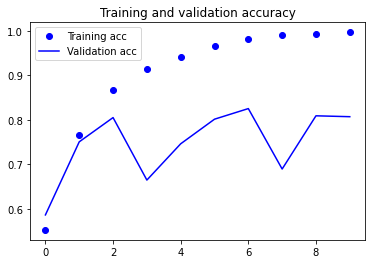

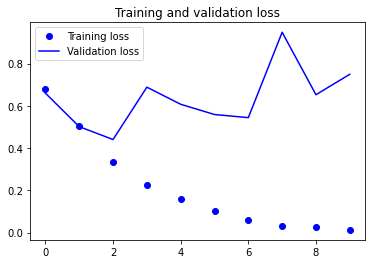

In [36]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence


max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data......')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad Sequences (samples x time')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

from tensorflow.keras.layers import Dense, Embedding

model = Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(input_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
